# PROYECTO 2 CURSO INTELIGENCIA ARTIFICAL

En este notebook desarrollaremos el proyecto numero 2 del curso de inteligencia artificial de la unviersidad del valle semestre 1 año 2019, el cual consta de cargar un conjunto de datos y generar diagramas de tortas e histogramas.

A continuacion podemos ver el codigo usado para cargar los datos en el archivo .csv los cuales se almacenan en un dataFrame de panda:

In [1]:
import csv
import pydot
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import scipy.stats as stats
import random
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
import warnings

data=[]
dataLlena = []
 
with open(r'./HeartDisease.csv', newline='') as File:  
    reader = csv.reader(File)
    for row in reader:
        data.append(row)

pf = pd.DataFrame(data,columns= data[0])
pf.drop([0], inplace=True)
pf.describe()



,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
count,457,457,457,457,457,457,457,457,457,457,457,457,457
unique,457,46,2,4,47,171,3,4,94,3,33,2,3
top,221,54,1,4,120,0,0,0,,0,0,0,Hungary
freq,1,31,364,227,79,82,347,320,33,272,233,247,294


# Diagramas

Para la primera parte del proyecto se pide realizar histogramas y diagrmas de torta con los datos cargados en el paso anterior para lo cual se deben convertir a enteros mediante la funcion convertirentero, para los histogramas usamos la funcion graficar y para los diagramas de torta la funcion graficarpie, al final tenemos un for que recorre cada columna del dataFrame y la pasa a la funcion correspondiente, como se ve a continuacion:


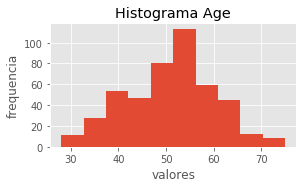

<Figure size 432x288 with 0 Axes>

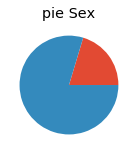

<Figure size 432x288 with 0 Axes>

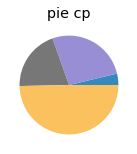

<Figure size 432x288 with 0 Axes>

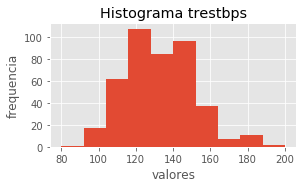

<Figure size 432x288 with 0 Axes>

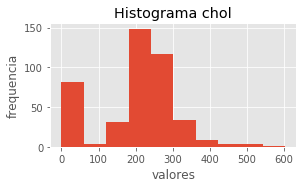

<Figure size 432x288 with 0 Axes>

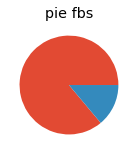

<Figure size 432x288 with 0 Axes>

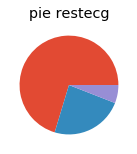

<Figure size 432x288 with 0 Axes>

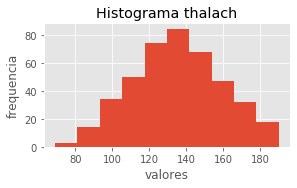

<Figure size 432x288 with 0 Axes>

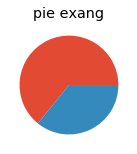

<Figure size 432x288 with 0 Axes>

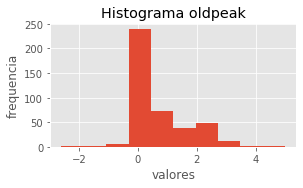

<Figure size 432x288 with 0 Axes>

In [2]:
def convertirentero(vectorentrada):
    vectorsalida = []
    for i in vectorentrada:
        if (i != ''):
            vectorsalida.append(float(i))
    return vectorsalida
            

def graficar(vector, nombre):
    fig = plt.figure(figsize=(15,5))
    plt.subplot2grid((2,3),(0,0))
    plt.hist(vector, 10)
    plt.ylabel('frequencia')
    plt.xlabel('valores')
    plt.title('Histograma'+ ' ' + nombre)
    plt.show()
    plt.clf()
    
def graficarpie(vector, nombre):
    fig = plt.figure(figsize=(15,5))
    veces0 = vector.count(0)
    veces1 = vector.count(1)
    veces2 = vector.count(2)
    veces3 = vector.count(3)
    veces4 = vector.count(4)
    plt.subplot2grid((2,3),(0,0))
    plt.pie([veces0,veces1,veces2,veces3,veces4])
    plt.title('pie'+ ' ' + nombre)
    plt.show()
    plt.clf()

for i in range(1, 11):
    if (i == 1 or i == 4 or i==5 or i==8 or i== 10):
        graficar(convertirentero(pf.iloc[:, i]),list(pf)[i])
    else:
        graficarpie(convertirentero(pf.iloc[:,i]), list(pf)[i])


# Rellenado de Datos

El tercer paso es rellenar el dataFrame con la informacion para que no queden espacios en blanco, para lo cual usaremos 2 formas (Variables aleatorias, media de los datos) y despues de aplicar el cada clasificador veremos cual es la mejor opcion y combinacion

In [3]:
def llenarNumeroAleatorio(vector,inferior,superior):
    vectorsalida = []
    for i in vector:
        if (i != ''):
            vectorsalida.append(int(i))
        else:
            vectorsalida.append(random.randint(inferior, superior))
    return vectorsalida


def llenarMedia(vector):
    contador = 0
    total = 0
    media = 0
    vectorsalida = []
    for i in vector:
        if (i != '') :
            contador = contador + 1
            total = total + int(i)
    media = total/contador
    for i in vector:
        if (i != ''):
            vectorsalida.append(int(i))
        else:
            vectorsalida.append(round(media))
    return vectorsalida

def llenarMedia2(vector):
    contador = 0
    total = 0
    media = 0
    vectorsalida = []
    for i in vector:
        if (i != '') :
            contador = contador + 1
            total = total + float(i)
    media = total/contador
    for i in vector:
        if (i != ''):
            vectorsalida.append(float(i))
        else:
            vectorsalida.append(round(media,1))
    return vectorsalida

def llenarPais(vector):
    vectorsalida = []
    for i in vector:
        if (i != ''):
            vectorsalida.append(i)
        else:
            vectorsalida.append(media)
    return vectorsalida

for i in range(0, 13):
    if (i == 1 or i == 4 or i==5 or i==8):
        vector = llenarMedia(pf.iloc[:,i])
        dataLlena.append(vector)
    elif (i==12):
        vector = llenarPais(pf.iloc[:,i])
        dataLlena.append(vector)
    elif (i==10):
        vector = llenarMedia2(pf.iloc[:,i])
        dataLlena.append(vector)
    else:
        vector = llenarNumeroAleatorio(pf.iloc[:,i],0,1)
        dataLlena.append(vector)

datos=[]
dataTranspuesta = []

for i in range(0,457):
    datos =[]
    for j in dataLlena:
        datos.append(j[i])
    dataTranspuesta.append(datos)
    

df = pd.DataFrame(dataTranspuesta,columns= list(pf))
print(df.head())    
    



   ID  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   28    1   2       130   132    0        2      185      0      0.0   
1   2   29    1   2       120   243    0        0      160      0      0.0   
2   3   29    1   2       140   200    0        0      170      0      0.0   
3   4   30    0   1       170   237    0        1      170      0      0.0   
4   5   31    0   2       100   219    0        1      150      0      0.0   

   num    Place  
0    0  Hungary  
1    0  Hungary  
2    0  Hungary  
3    0  Hungary  
4    0  Hungary  


# ARBOL DE DESICION

Luego de rellenar los datos faltantes se procede a dividir en 2 los datos 80% para entrenamiento y 20% para pruebas, una vez divididos se pasa a realizar el punto de arbol de desicion.

Antes de llegar al paso anterior visualizamos de todos los casos cuantos nos dan positivos para enfermedad y negativos y luego vemos la relacion de edad-edad colesterol para saber si se cuenta o no con enfermedades cardiacas.

Numero de casos positivos y negativos
num
0    247
1    210
dtype: int64

 Relacion edad-colesterol, azul positivos - naranja negativo


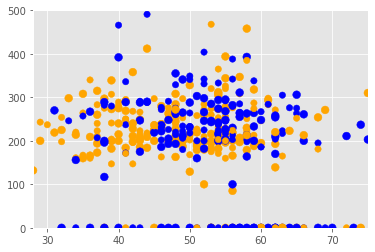

Se puede observar que los datos son dispersos y hay mayor concentracion de puntos azules en el centro del diagrama


In [4]:
print("Numero de casos positivos y negativos")
print(df.groupby('num').size())

#sb.catplot('num',data=df,kind="count")
#sb.catplot('Sex',data=df,kind="count")
#sb.catplot('cp',data=df,kind="count")
#sb.catplot('Age',data=df,kind="count",aspect = 3)
#sb.catplot('trestbps',data=df,kind="count",aspect = 3)

print( "\n Relacion edad-colesterol, azul positivos - naranja negativo")
f1 = df['Age'].values
f2 = df['chol'].values
#Azul positivo
#Naranja Negativo
colores=['orange','blue'] 
tamanios=[60,40] 
 
asignar=[]
asignar2=[]
for index, row in df.iterrows():    
    asignar.append(colores[row['num']])
    asignar2.append(tamanios[row['num']])
 
plt.scatter(f1, f2, c=asignar, s=tamanios)
plt.axis([28,75,0,500])
plt.show()

print("Se puede observar que los datos son dispersos y hay mayor concentracion de puntos azules en el centro del diagrama")


# Mapeo de datos

Para poder realizar el arbol de desicion es necesario mapear los datos de tal manera que tengamos rangos donde clasificarlos y que las ciudades se vuelvan enteros, para eso realizamos un mapero de datos que se muestra a continuacion, guardandolos en un nuevo dataframe

In [5]:
# Age Mapping 
df.loc[ df['Age'] <= 38, 'AgeEncoded'] = 0
df.loc[(df['Age'] > 38) & (df['Age'] <= 48), 'AgeEncoded'] = 1
df.loc[(df['Age'] > 48) & (df['Age'] <= 58), 'AgeEncoded'] = 2
df.loc[(df['Age'] > 58) & (df['Age'] <= 68), 'AgeEncoded'] = 3
df.loc[ df['Age'] > 68, 'AgeEncoded'] = 4


# trestbps Mapping 
df.loc[ df['trestbps'] <= 100, 'trestbpsEncoded'] = 0
df.loc[(df['trestbps'] > 100) & (df['trestbps'] <= 120), 'trestbpsEncoded'] = 1
df.loc[(df['trestbps'] > 120) & (df['trestbps'] <= 140), 'trestbpsEncoded'] = 2
df.loc[(df['trestbps'] > 140) & (df['trestbps'] <= 160), 'trestbpsEncoded'] = 3
df.loc[(df['trestbps'] > 160) & (df['trestbps'] <= 180), 'trestbpsEncoded'] = 4
df.loc[ df['trestbps'] > 180, 'trestbpsEncoded'] = 5

# chol Mapping 
df.loc[ df['chol'] <= 100, 'cholEncoded'] = 0
df.loc[(df['chol'] > 100) & (df['chol'] <= 200), 'cholEncoded'] = 1
df.loc[(df['chol'] > 200) & (df['chol'] <= 300), 'cholEncoded'] = 2
df.loc[(df['chol'] > 300) & (df['chol'] <= 400), 'cholEncoded'] = 3
df.loc[(df['chol'] > 400) & (df['chol'] <= 500), 'cholEncoded'] = 4
df.loc[ df['chol'] > 500, 'cholEncoded'] = 5

# thalach Mapping 
df.loc[ df['thalach'] <= 90, 'thalachEncoded'] = 0
df.loc[(df['thalach'] > 90) & (df['thalach'] <= 110), 'thalachEncoded'] = 1
df.loc[(df['thalach'] > 110) & (df['thalach'] <= 130), 'thalachEncoded'] = 2
df.loc[(df['thalach'] > 130) & (df['thalach'] <= 150), 'thalachEncoded'] = 3
df.loc[(df['thalach'] > 150) & (df['thalach'] <= 170), 'thalachEncoded'] = 4
df.loc[ df['thalach'] > 170, 'thalachEncoded'] = 5

# oldpeak Mapping 
df.loc[ df['oldpeak'] <= -1, 'oldpeakEncoded'] = 0
df.loc[(df['oldpeak'] > -1) & (df['oldpeak'] <= 0), 'oldpeakEncoded'] = 1
df.loc[(df['oldpeak'] > 0) & (df['oldpeak'] <= 1), 'oldpeakEncoded'] = 2
df.loc[(df['oldpeak'] > 1) & (df['oldpeak'] <= 2), 'oldpeakEncoded'] = 3
df.loc[(df['oldpeak'] > 2) & (df['oldpeak'] <= 3), 'oldpeakEncoded'] = 4
df.loc[ df['oldpeak'] > 3, 'oldpeakEncoded'] = 5

# Tempo Mapping 

df['PlaceEncoded'] = df['Place'].map( {'Hungary': 0, 
                                          'Switzerland': 1, 
                                          'VA': 2, 
                                          '':0} 
                                       ).astype(int)

drop_elements = ['ID','Age','trestbps','chol','thalach','oldpeak','Place']
df_encoded = df.drop(drop_elements, axis = 1)
print(df_encoded)



     Sex  cp  fbs  restecg  exang  num  AgeEncoded  trestbpsEncoded  \
0      1   2    0        2      0    0         0.0              2.0   
1      1   2    0        0      0    0         0.0              1.0   
2      1   2    0        0      0    0         0.0              2.0   
3      0   1    0        1      0    0         0.0              4.0   
4      0   2    0        1      0    0         0.0              0.0   
5      0   2    0        0      0    0         0.0              1.0   
6      1   2    0        0      0    0         0.0              1.0   
7      1   2    0        0      0    0         0.0              2.0   
8      1   3    0        0      0    0         0.0              1.0   
9      0   2    0        0      0    0         0.0              2.0   
10     1   2    0        1      0    0         0.0              3.0   
11     1   2    0        0      0    0         0.0              0.0   
12     0   1    0        1      0    0         0.0              1.0   
13    

# Entrenamiento 

Este paso nos sirve para saber los niveles del arbol que usaremos

In [6]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(df_encoded))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={0:1.1})
    for train_fold, valid_fold in cv.split(df_encoded):
        f_train = df_encoded.loc[train_fold] 
        f_valid = df_encoded.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['num'], axis=1), 
                               y = f_train["num"]) 
        valid_acc = model.score(X = f_valid.drop(['num'], axis=1), 
                                y = f_valid["num"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df2 = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df2 = df2[["Max Depth", "Average Accuracy"]]
print(df2.to_string(index=False))


print("Observamos que hay 4 elementos que superan el 70% por lo tanto nuestro arbol sera de profundidad 4 ya que estos seran los que nos brinden mas informacion")



 Max Depth  Average Accuracy
         1          0.752271
         2          0.647440
         3          0.714976
         4          0.665507
         5          0.687053
         6          0.689324
         7          0.680628
         8          0.680628
         9          0.680628
        10          0.680628
        11          0.680628
        12          0.680628
Observamos que hay 4 elementos que superan el 70% por lo tanto nuestro arbol sera de profundidad 4 ya que estos seran los que nos brinden mas informacion


# Creacion del arbol

Se crea el arbol de desicion y se imprime en la ultima parte del notebook 


In [7]:
# Create a new array with the added features: features_two
features = df_encoded[["Sex","cp","fbs","restecg","exang","AgeEncoded","trestbpsEncoded","cholEncoded","thalachEncoded","oldpeakEncoded","PlaceEncoded"]].values
target = df_encoded["num"].values


# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

    
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=10,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            )
decision_tree.fit(trainX, trainY)
#Print the score on the train data
print(decision_tree.score(trainX, trainY))
#Print the score on the test data
print(decision_tree.score(testX, testY))    
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(df_encoded.drop(['num'], axis=1)),
                              class_names = ['No Enfermo', 'Enfermo'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo

#check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])#solo en ubuntu
#print(PImage("tree1.png"))#solo en ubuntu
#(graph,) = pydot.graph_from_dot_file('tree1.dot')
#graph.write_png('tree1.png')



(365, 11) (365,)
(92, 11) (92,)
0.8082191780821918
0.8043478260869565


# Pruebas



In [8]:
y_pred = decision_tree.predict(testX)
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(testX)
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred]* 100, 2))+"%")



NameError: name 'testX_encoded' is not defined

## Arbol resultado
A continuación se muestra el arbol resultado, es importante saber que este arbol es que se usa para la clasificación, y es resultado del entrenamiento de los datos.

![title](tree1.png)


# Redes neuronales

A continuacion se resolvera el problema con redes neuronales



In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense

# cargamos las 4 combinaciones de las compuertas XOR
training_data = trainX

# y estos son los resultados que se obtienen, en el mismo orden
target_data = trainY

model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(training_data, target_data, epochs=1000,batch_size=10)

# evaluamos el modelo
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())


# calcula las predicciones
predictions = model.predict(testX)
# redondeamos las predicciones
rounded = [round(x[0]) for x in predictions]
print(rounded)

print(testY)